In [75]:
from michigrad.engine import Value
from michigrad.visualize import show_graph, show_graph_interactive
import numpy as np




In [76]:
import importlib
import michigrad.nn
importlib.reload(michigrad.nn)
from michigrad.nn import Neuron, Layer, MLP

In [ ]:
# Definición de datos de entrada (xs) y las salidas esperadas (ys)

xs = [[Value(0), Value(0)], [Value(0), Value(1)], [Value(1), Value(0)], [Value(1), Value(1)]]
ys = [Value(0), Value(1), Value(1), Value(0)] 


# Definición del modelo
# El modelo XOR devuelve 0 si dos números binarios son iguales y 1 si son distintos
# entonces (0, 0), (1, 1) -> 0; (0, 1), (1, 0) --> 1 

xor_model = MLP(2, [2, 1], nonlin="sigmoid") 
    # dos entradas
    # una capa oculta con dos entradas
    # una salida
    # función de activación lineal

In [78]:
for layer in xor_model.layers:
    for neuron in layer.neurons:
        print(neuron)

Sigmoid Neuron(2)
Sigmoid Neuron(2)
Sigmoid Neuron(2)
Sigmoid Neuron(3)
Sigmoid Neuron(3)
Sigmoid Neuron(3)
Linear Neuron(3)


In [79]:
# Entrenamiento del modelo

lr = 0.1
epochs = 500

# iterar n veces
for _ in range(epochs):

    # forward pass
    yhats = [xor_model(x) for x in xs] # en clase hace xor_model(x)[0]

    # loss (testear si a cada iteración disminuye)
    # calcula el mse de cada combinación del zip
    # divide por 4 para tener el promedio  
    L = sum([(y - yhat)**2 for y, yhat in zip(ys, yhats)])/4

    # zero grad
    for p in xor_model.parameters():
        p.grad = 0.0

    # backward pass
    L.backward()

    # update weights
    for p in xor_model.parameters():
        p.data -= p.grad * lr

    print(L.data)

0.5
0.41000000000000003
0.35239999999999994
0.31553600000000004
0.29194304
0.2768435456
0.267179869184
0.26099511627776
0.2570368744177664
0.25450359962737046
0.2528823037615171
0.25184467440737096
0.25118059162071743
0.25075557863725917
0.25048357032784585
0.25030948500982136
0.25019807040628567
0.2501267650600228
0.2500811296384146
0.25005192296858536
0.2500332306998946
0.25002126764793253
0.25001361129467686
0.25000871122859314
0.2500055751862996
0.25000356811923174
0.2500022835963084
0.2500014615016373
0.2500009353610479
0.25000059863107066
0.25000038312388523
0.25000024519928654
0.2500001569275434
0.25000010043362775
0.25000006427752175
0.2500000411376139
0.25000002632807294
0.25000001684996664
0.25000001078397865
0.2500000069017464
0.25000000441711767
0.2500000028269553
0.25000000180925136
0.2500000011579209
0.2500000007410694
0.2500000004742844
0.250000000303542
0.2500000001942669
0.25000000012433077
0.25000000007957174
0.2500000000509259
0.25000000003259254
0.25000000002085926


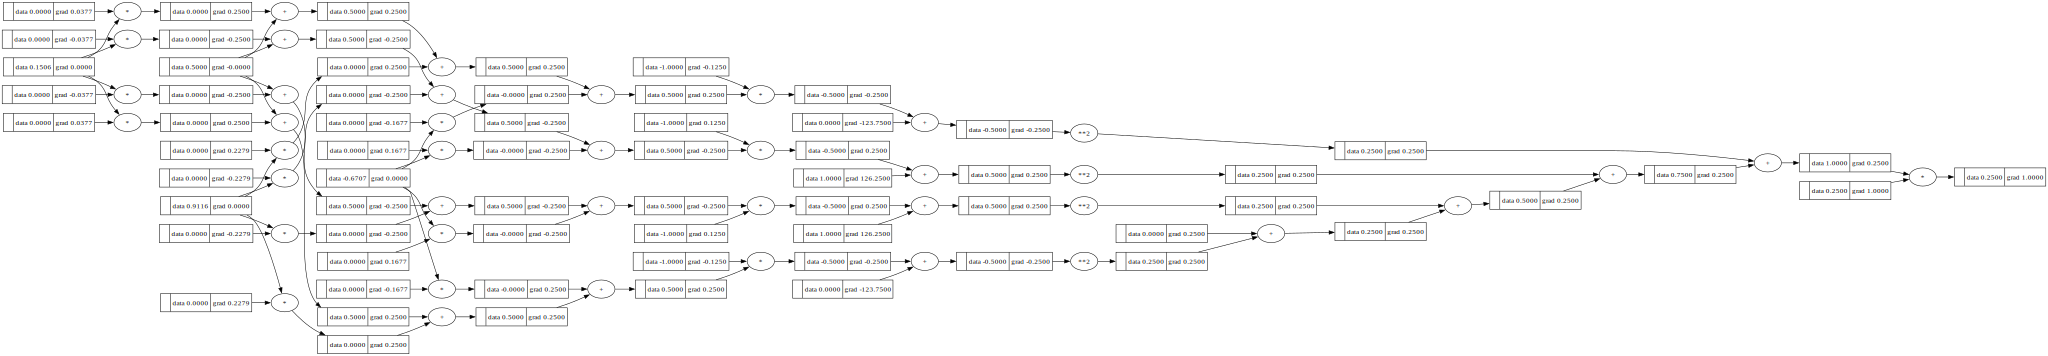

In [80]:
# Mostrar grafo de pérdida

show_graph(L)